# Preparing the environment

## Graphics and plotting

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# general graphics settings
matplotlib.rcParams['figure.figsize'] = (10, 7)

In [2]:
import seaborn as sea

## SQL database connection

Before we can use the `%sql` syntax, two steps must be taken:

* Load the IPython-SQL bridge code:

In [3]:
%load_ext sql

* Connect to an actual database; this must be the first `%sql` statement!

In [5]:
%sql postgresql://rmurri@/s_cerevisiae

u'Connected: rmurri@s_cerevisiae'

# Exploration of the Interactome *S. Cerevisiae* data set

The `y2h_union` table lists interacting proteins (by name); a pair *(proteinA, proteinB)* appears in the table if *proteinA* interacts with *proteinB*.  Note that the "interacts with" relation need not be symmetric!

This describes a *directed* graph, where the proteins are the vertices and each interaction defines an edge.

Let us have a look at the `y2h_union` table:

In [6]:
%sql select * from y2h_union limit 3;

3 rows affected.


symbol_a,symbol_b
Q0085,YCR106W
TORF1,YCR106W
TORF19,YDR361C


Alternatively, one can load the data from the `Y2H_union.tsv` file using only Python functions:

In [7]:
data = []
with open('Y2H_union.tsv', 'r') as stream:
    for line in stream:
        data.append(line.split())

In [48]:
data

[['MEL1', 'YJL092W'],
 ['Q0085', 'YCR106W'],
 ['TORF1', 'YCR106W'],
 ['TORF19', 'YDR361C'],
 ['TORF21', 'YKR048C'],
 ['TORF47', 'YCR106W'],
 ['YAL005C', 'YBR101C'],
 ['YAL012W', 'YAL012W'],
 ['YAL016W', 'YIL065C'],
 ['YAL016W', 'YNL127W'],
 ['YAL020C', 'YBL071WA'],
 ['YAL021C', 'YJL112W'],
 ['YAL021C', 'YMR124W'],
 ['YAL021C', 'YMR181C'],
 ['YAL021C', 'YNR052C'],
 ['YAL024C', 'YHR158C'],
 ['YAL027W', 'YPL022W'],
 ['YAL028W', 'YDL239C'],
 ['YAL032C', 'YDR416W'],
 ['YAL032C', 'YDR448W'],
 ['YAL032C', 'YDR532C'],
 ['YAL032C', 'YJL112W'],
 ['YAL032C', 'YLR345W'],
 ['YAL032C', 'YLR423C'],
 ['YAL032C', 'YNL229C'],
 ['YAL032C', 'YPL151C'],
 ['YAL034WA', 'YGL172W'],
 ['YAL034WA', 'YGR120C'],
 ['YAL034WA', 'YJR112W'],
 ['YAL034WA', 'YKL103C'],
 ['YAL036C', 'YDR152W'],
 ['YAL036C', 'YDR448W'],
 ['YAL036C', 'YLR423C'],
 ['YAL036C', 'YOR174W'],
 ['YAL040C', 'YJL013C'],
 ['YAL041W', 'YBR200W'],
 ['YAL044WA', 'YDR098C'],
 ['YAL044WA', 'YER174C'],
 ['YAL044WA', 'YNL218W'],
 ['YAL044WA', 'YNL249C'],
 

----

*Each of the following questions admit a solution using an algorithm in Python, or just an SQL query.*

Use whichever suits you best.

## 1. How can you compute the "in-degree" of a given vertex?

In [36]:
%sql select symbol_a, count(*) from y2h_union where symbol_a = 'YCR106W'  group by symbol_a;

1 rows affected.


symbol_a,count
YCR106W,16


## 2. How can you compute the "out-degree" of a given vertex?

In [38]:
%sql select symbol_b, count(*) from y2h_union  where symbol_b = 'YCR106W' group by symbol_b;

1 rows affected.


symbol_b,count
YCR106W,4


## 3. How can you compute the degree (i.e., regardless of direction) of a given vertex

In [96]:
%sql select  count(*)  from y2h_union  where symbol_b = 'YCR106W' or symbol_a = 'YCR106W';

1 rows affected.


times
20


## 4. How can you compute the vertex degree distribution?

34 rows affected.


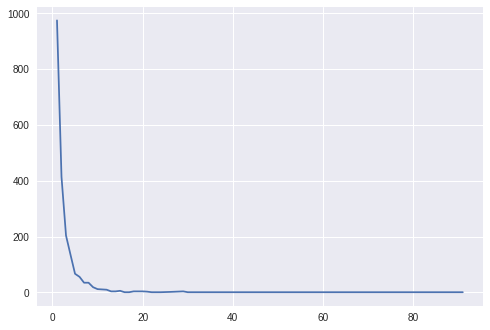

In [103]:
#%sql select symbol_a, symbol_b, count(*) from y2h_union  group by symbol_a, symbol_b;
result = %sql select symbol as degree, count(*) as times from (select symbol_a, count(*) as symbol from (select symbol_a from y2h_union union all select symbol_b  from y2h_union ) as Q1 group by symbol_a order by symbol ) as Q2 group by symbol

degree, times = zip(*result)
plt.plot(degree, times)